# 처음부터 끝까지 곧바로 실행하시면 됩니다.

## 라이브러리

In [1]:
pip freeze

absl-py==0.15.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3Note: you may need to restart the kernel to use updated packages.

anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:/

In [2]:
pip freeze > requirements.txt

testpath @ file:///home/ktietz/src/ci/testpath_1611930608132/work
textdistance @ file:///tmp/build/80754af9/textdistance_1612461398012/work
threadpoolctl @ file:///tmp/tmp9twdgx9k/threadpoolctl-2.1.0-py3-none-any.whl
three-merge @ file:///tmp/build/80754af9/three-merge_1607553261110/work
tifffile @ file:///tmp/build/80754af9/tifffile_1619636090847/work
toml @ file:///tmp/build/80754af9/toml_1616166611790/work
toolz @ file:///home/linux1/recipes/ci/toolz_1610987900194/work
tornado @ file:///C:/ci/tornado_1606942392901/work
tqdm @ file:///tmp/build/80754af9/tqdm_1615925068909/work
traitlets @ file:///home/ktietz/src/ci/traitlets_1611929699868/work
typed-ast @ file:///C:/ci/typed-ast_1610466535590/work
typing-extensions @ file:///home/ktietz/src/ci_mi/typing_extensions_1612808209620/work
ujson @ file:///C:/ci/ujson_1611241570789/work
unicodecsv==0.14.1
urllib3 @ file:///tmp/build/80754af9/urllib3_1615837158687/work
watchdog @ file:///C:/ci/watchdog_1612471251191/work
wcwidth @ file:///tmp

In [3]:
pip install -r requirements.txt

Processing c:\home\ktietz\src\ci\alabaster_1611921544520\work
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\home\\ktietz\\src\\ci\\alabaster_1611921544520\\work'



In [4]:
!nvidia-smi

Tue Dec  7 22:00:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.47       Driver Version: 472.47       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   32C    P8    18W / 350W |    497MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7865725536919197561
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22727688192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6690481391558866714
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [6]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

## 데이터 세트 다운로드, 압축 해제

In [7]:
!pip install gdown

# train 데이터 세트
!gdown --id "1-5B_eXd2dg2xKapXNt_vhBuYdG-jtkoO"

# validation & test 데이터 세트
!gdown --id "1jX2NKwH_eqUJU8iCNCLIjB3WwLX-aR2z"

# 추가 test 데이터 세트
!gdown --id "11dlBn_8j_9SaGxSCN_hXbin750C_cXYT"

Downloading...
From: https://drive.google.com/uc?id=1-5B_eXd2dg2xKapXNt_vhBuYdG-jtkoO
To: C:\Users\ngkim\Downloads\MDL\Term project\최종 보고\ClsKLData.zip

  0%|          | 0.00/591M [00:00<?, ?B/s]
  0%|          | 524k/591M [00:00<03:18, 2.98MB/s]
  0%|          | 1.05M/591M [00:00<02:38, 3.73MB/s]
  0%|          | 2.10M/591M [00:00<01:43, 5.68MB/s]
  1%|          | 3.15M/591M [00:00<01:22, 7.16MB/s]
  1%|          | 4.72M/591M [00:00<01:08, 8.53MB/s]
  1%|1         | 6.29M/591M [00:00<00:59, 9.88MB/s]
  1%|1         | 7.34M/591M [00:00<01:03, 9.18MB/s]
  2%|1         | 9.44M/591M [00:01<00:55, 10.5MB/s]
  2%|1         | 11.0M/591M [00:01<00:50, 11.5MB/s]
  2%|2         | 12.6M/591M [00:01<00:58, 9.94MB/s]
  2%|2         | 14.7M/591M [00:01<00:47, 12.2MB/s]
  3%|2         | 16.3M/591M [00:01<00:50, 11.3MB/s]
  3%|3         | 17.8M/591M [00:01<00:49, 11.5MB/s]
  3%|3         | 19.4M/591M [00:01<00:47, 12.0MB/s]
  4%|3         | 21.0M/591M [00:02<00:51, 11.1MB/s]
  4%|3         | 22.5M/59

Downloading...
From: https://drive.google.com/uc?id=1jX2NKwH_eqUJU8iCNCLIjB3WwLX-aR2z
To: C:\Users\ngkim\Downloads\MDL\Term project\최종 보고\KneeXray.zip

  0%|          | 0.00/120M [00:00<?, ?B/s]
  0%|          | 524k/120M [00:00<00:50, 2.35MB/s]
  1%|1         | 1.57M/120M [00:00<00:29, 3.96MB/s]
  3%|2         | 3.15M/120M [00:00<00:19, 5.96MB/s]
  4%|3         | 4.72M/120M [00:00<00:15, 7.53MB/s]
  5%|5         | 6.29M/120M [00:00<00:12, 8.87MB/s]
  7%|6         | 7.86M/120M [00:00<00:10, 10.5MB/s]
  8%|7         | 9.44M/120M [00:01<00:11, 9.95MB/s]
 10%|9         | 11.5M/120M [00:01<00:09, 11.4MB/s]
 11%|#         | 13.1M/120M [00:01<00:09, 10.7MB/s]
 12%|#2        | 14.7M/120M [00:01<00:08, 11.7MB/s]
 14%|#3        | 16.3M/120M [00:01<00:09, 10.7MB/s]
 15%|#5        | 18.4M/120M [00:01<00:08, 12.0MB/s]
 17%|#6        | 19.9M/120M [00:02<00:09, 10.3MB/s]
 18%|#8        | 22.0M/120M [00:02<00:07, 12.3MB/s]
 20%|#9        | 23.6M/120M [00:02<00:08, 11.3MB/s]
 21%|##1       | 25.2M/120

In [8]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('./ClsKLData.zip')
fantasy_zip.extractall('./ClsKLData')
fantasy_zip.close()

In [9]:
import zipfile
fantasy_zip = zipfile.ZipFile('./KneeXray.zip')
fantasy_zip.extractall('./KneeXray') 
fantasy_zip.close()

In [10]:
import zipfile
fantasy_zip = zipfile.ZipFile('./plus_test_data.zip')
fantasy_zip.extractall('./plus_test_data')
fantasy_zip.close()

In [11]:
train_aug = ImageDataGenerator(rescale=1./255)
valid_aug = ImageDataGenerator(rescale=1./255)

## 학습 데이터

In [12]:
n_class = 5

root_path = ".\ClsKLData\\kneeKL224\\"

folder_list = os.listdir(root_path)
image_path_list = []
label_list = []

for folder in folder_list:
    for label in range(n_class):
        image_list = os.listdir(f"{root_path}{folder}/{label}")
        image_path_list += [ f"{root_path}{folder}/{label}/"+ path for path in image_list]
        label_list += [label] * len(image_list)

df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

In [13]:
df_train_kaggle.shape

(9786, 2)

## 학습 데이터 분포

Text(0, 0.5, 'count')

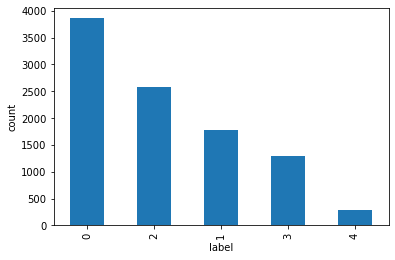

In [14]:
df_train_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [15]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = df_train_kaggle,
    directory = None,
    x_col="filepath",
    y_col="label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 9786 validated image filenames.


## 검증, 테스트 데이터

In [17]:
compi_root_path= ".\\KneeXray\\KneeXray\\"
df_val_compi = pd.read_csv(compi_root_path + "Train.csv")
df_val_compi["filename"] = df_val_compi.filename.apply(lambda x: compi_root_path+"train/" + x)
df_val_compi.head()

,filename,label
0,.\KneeXray\KneeXray\train/Image_1.jpg,0
1,.\KneeXray\KneeXray\train/Image_2.jpg,1
2,.\KneeXray\KneeXray\train/Image_3.jpg,0
3,.\KneeXray\KneeXray\train/Image_4.jpg,1
4,.\KneeXray\KneeXray\train/Image_5.jpg,2


In [18]:
df_val_compi.shape

(7828, 2)

## 검증 데이터 분포

Text(0, 0.5, 'count')

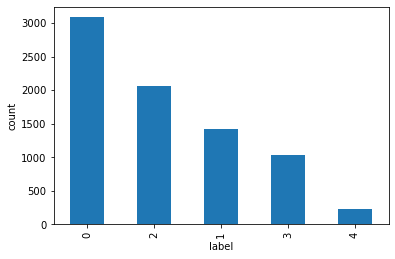

In [19]:
df_val_compi.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [20]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe= df_val_compi,
    x_col = "filename",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 7828 validated image filenames.


## 모델 구조

In [22]:
xception = Xception(weights="imagenet",)
x =  xception.layers[-10].output

x = tf.keras.layers.Conv2D(filters = 1536, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 1024, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 768, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 384, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = 16, kernel_size= 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.Conv2D(filters = n_class, kernel_size = 3, padding = "same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

GAP = tf.keras.layers.GlobalAveragePooling2D()(x)
pred = tf.keras.activations.softmax(GAP)

xception_model = Model(inputs=xception.input,outputs=pred)

In [23]:
xception_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [24]:
xception_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),
                 metrics=["acc"],
                 loss= tf.keras.losses.sparse_categorical_crossentropy)

checkpoint_path = "xception_best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
               ModelCheckpoint(
                   checkpoint_path,
                   monitor = 'val_acc',
                   verbose = 1,
                   save_weights_only=True,
                   save_best_only = True,
                   mode="max"
               ),
               EarlyStopping(
                   monitor='val_loss', 
                   patience=10,
                   verbose=0
               ),
               ReduceLROnPlateau(
                   monitor='val_loss', 
                   patience=10,
                   verbose=1)
]

## 가중치 부여

In [25]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes= np.unique(df_train_kaggle.label.values),
    y= df_train_kaggle.label.values
)

class_weights = dict(enumerate(class_weights))

## 학습

In [26]:
xception_model.fit(
        train_generator,
        epochs = 300,
        validation_data = valid_generator,
        callbacks = [my_callbacks],
        class_weight = class_weights
)

xception_model.load_weights(checkpoint_path)

Epoch 1/300
1224/1224 [==============================] - 124s 98ms/step - loss: 1.4987 - acc: 0.2649 - val_loss: 1.4454 - val_acc: 0.4265

Epoch 00001: val_acc improved from -inf to 0.42655, saving model to xception_best.ckpt
Epoch 2/300
1224/1224 [==============================] - 118s 96ms/step - loss: 1.3024 - acc: 0.4211 - val_loss: 1.3794 - val_acc: 0.5212

Epoch 00002: val_acc improved from 0.42655 to 0.52121, saving model to xception_best.ckpt
Epoch 3/300
1224/1224 [==============================] - 118s 97ms/step - loss: 1.1941 - acc: 0.5083 - val_loss: 1.2471 - val_acc: 0.5809

Epoch 00003: val_acc improved from 0.52121 to 0.58086, saving model to xception_best.ckpt
Epoch 4/300
1224/1224 [==============================] - 118s 97ms/step - loss: 1.1112 - acc: 0.5495 - val_loss: 1.1383 - val_acc: 0.6404

Epoch 00004: val_acc improved from 0.58086 to 0.64039, saving model to xception_best.ckpt
Epoch 5/300
1224/1224 [==============================] - 118s 96ms/step - loss: 1.0576 

Epoch 40/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.5297 - acc: 0.9887 - val_loss: 0.5082 - val_acc: 0.9824

Epoch 00040: val_acc did not improve from 0.98889
Epoch 41/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.5350 - acc: 0.9886 - val_loss: 0.5134 - val_acc: 0.9769

Epoch 00041: val_acc did not improve from 0.98889
Epoch 42/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.5318 - acc: 0.9899 - val_loss: 0.4922 - val_acc: 0.9849

Epoch 00042: val_acc did not improve from 0.98889
Epoch 43/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.5285 - acc: 0.9893 - val_loss: 0.4837 - val_acc: 0.9881

Epoch 00043: val_acc did not improve from 0.98889
Epoch 44/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.5222 - acc: 0.9912 - val_loss: 0.4974 - val_acc: 0.9847

Epoch 00044: val_acc did not improve from 0.98889
Epoch 45/300
1224/1224 [==========================

1224/1224 [==============================] - 119s 97ms/step - loss: 0.4887 - acc: 0.9976 - val_loss: 0.4327 - val_acc: 0.9923

Epoch 00082: val_acc did not improve from 0.99272
Epoch 83/300
1224/1224 [==============================] - 118s 97ms/step - loss: 0.4828 - acc: 0.9972 - val_loss: 0.4362 - val_acc: 0.9879

Epoch 00083: val_acc did not improve from 0.99272
Epoch 84/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4810 - acc: 0.9970 - val_loss: 0.4215 - val_acc: 0.9928

Epoch 00084: val_acc improved from 0.99272 to 0.99285, saving model to xception_best.ckpt
Epoch 85/300
1224/1224 [==============================] - 118s 96ms/step - loss: 0.4822 - acc: 0.9972 - val_loss: 0.4710 - val_acc: 0.9748

Epoch 00085: val_acc did not improve from 0.99285
Epoch 86/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4849 - acc: 0.9972 - val_loss: 0.4216 - val_acc: 0.9931

Epoch 00086: val_acc improved from 0.99285 to 0.99310, saving model to xc

1224/1224 [==============================] - 119s 97ms/step - loss: 0.4658 - acc: 0.9985 - val_loss: 0.4055 - val_acc: 0.9925

Epoch 00124: val_acc did not improve from 0.99502
Epoch 125/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4536 - acc: 0.9988 - val_loss: 0.3934 - val_acc: 0.9949

Epoch 00125: val_acc did not improve from 0.99502
Epoch 126/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4550 - acc: 0.9995 - val_loss: 0.4072 - val_acc: 0.9922

Epoch 00126: val_acc did not improve from 0.99502
Epoch 127/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4568 - acc: 0.9990 - val_loss: 0.4026 - val_acc: 0.9937

Epoch 00127: val_acc did not improve from 0.99502
Epoch 128/300
1224/1224 [==============================] - 119s 97ms/step - loss: 0.4532 - acc: 0.9980 - val_loss: 0.4096 - val_acc: 0.9932

Epoch 00128: val_acc did not improve from 0.99502
Epoch 129/300
1224/1224 [==============================] - 

## 위의 학습에서 사용하였던 검증 데이터 세트에 대한 추가 학습

### 검증 데이터 세트를 학습, 검증 데이터 세트로 재구성하여 추가 학습 진행

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df_val_compi, 
    test_size=0.1,
    random_state=42,
    stratify= df_val_compi.label
)

In [28]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filename",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 7045 validated image filenames.


In [29]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe=X_test,
    x_col = "filename",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 783 validated image filenames.


In [30]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID =valid_generator.n//valid_generator.batch_size

In [31]:
xception_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,callbacks=[my_callbacks]
)

Epoch 1/50
880/880 [==============================] - 77s 86ms/step - loss: 0.5832 - acc: 0.9805 - val_loss: 0.3858 - val_acc: 0.9987

Epoch 00001: val_acc improved from 0.99502 to 0.99871, saving model to xception_best.ckpt
Epoch 2/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5710 - acc: 0.9883 - val_loss: 0.3892 - val_acc: 0.9987

Epoch 00002: val_acc did not improve from 0.99871
Epoch 3/50
880/880 [==============================] - 76s 86ms/step - loss: 0.5738 - acc: 0.9905 - val_loss: 0.3848 - val_acc: 0.9961

Epoch 00003: val_acc did not improve from 0.99871
Epoch 4/50
880/880 [==============================] - 76s 86ms/step - loss: 0.5678 - acc: 0.9902 - val_loss: 0.3821 - val_acc: 0.9987

Epoch 00004: val_acc did not improve from 0.99871
Epoch 5/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5721 - acc: 0.9918 - val_loss: 0.3878 - val_acc: 0.9987

Epoch 00005: val_acc did not improve from 0.99871
Epoch 6/50
880/880 [===============


Epoch 00044: val_acc did not improve from 1.00000
Epoch 45/50
880/880 [==============================] - 76s 86ms/step - loss: 0.5394 - acc: 0.9984 - val_loss: 0.3819 - val_acc: 0.9974

Epoch 00045: val_acc did not improve from 1.00000
Epoch 46/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5407 - acc: 0.9980 - val_loss: 0.3707 - val_acc: 0.9987

Epoch 00046: val_acc did not improve from 1.00000
Epoch 47/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5406 - acc: 0.9982 - val_loss: 0.3715 - val_acc: 0.9987

Epoch 00047: val_acc did not improve from 1.00000
Epoch 48/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5438 - acc: 0.9979 - val_loss: 0.3736 - val_acc: 0.9987

Epoch 00048: val_acc did not improve from 1.00000
Epoch 49/50
880/880 [==============================] - 75s 85ms/step - loss: 0.5411 - acc: 0.9982 - val_loss: 0.3741 - val_acc: 0.9987

Epoch 00049: val_acc did not improve from 1.00000
Epoch 50/50
880/880

In [32]:
xception_model.load_weights(checkpoint_path)

## 검증 데이터 Confusion Matrix

In [33]:
from sklearn.metrics import precision_recall_curve

target_shape = 224
BATCH_SIZE = 1

compi_gen = valid_aug.flow_from_dataframe(
    dataframe= X_test, 
    x_col= "filename",
    class_mode=None,
    target_size= (target_shape, target_shape),
    shuffle= False,
    batch_size= BATCH_SIZE
)

Found 783 validated image filenames.


In [34]:
predicition_compi = xception_model.predict(compi_gen, steps= compi_gen.n/ BATCH_SIZE, verbose= 1)

783/783 [==============================] - 6s 7ms/step


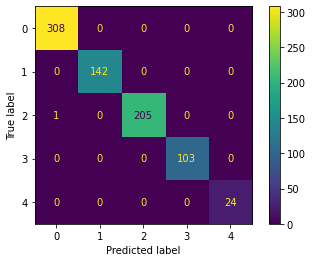

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_compi =  np.argmax(predicition_compi, axis= 1)
cm = confusion_matrix(X_test.label, class_prediction_compi, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

disp.plot()

## 추가 테스트 데이터 Confusion Matrix

In [48]:
n_class = 5
test_root_path = "C:\\Users\\ngkim\\Downloads\\MDL\\Term project\\최종 보고\\plus_test_data\\"
test_image_path_list = []
test_label_list = []

for label in range(n_class):
    test_image_list = os.listdir(f"{test_root_path}/{label}")
    test_image_path_list += [ f"{test_root_path}/{label}/"+ path for path in test_image_list]
    test_label_list += [label] * len(test_image_list)

df_test = pd.DataFrame({"filepath" : test_image_path_list, "label": test_label_list})
df_test

,filepath,label
0,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,0
1,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,0
2,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,0
3,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,0
4,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,0
...,...,...
526,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,4
527,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,4
528,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,4
529,C:\Users\ngkim\Downloads\MDL\Term project\최종 보...,4


In [37]:
df_test.shape

(531, 2)

## 추가 테스트 데이터 분포

Text(0, 0.5, 'count')

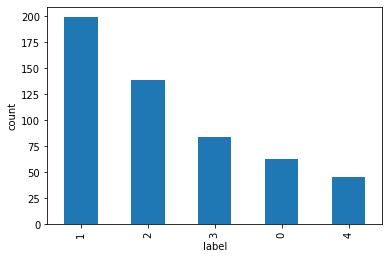

In [49]:
df_test.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [41]:
from sklearn.model_selection import train_test_split

seed = 42
test_da = train_test_split(
    df_test,
    test_size = 0.1,
    random_state = seed,
    stratify = df_test.label
  )

In [50]:
BS = 1
image_size = 224
seed = 42

da_test_generator = valid_aug.flow_from_dataframe(
    dataframe = df_test,
    directory = test_root_path,
    x_col = "filepath",
    y_col = 'label',
    batch_size = 1,
    seed = seed,
    shuffle = False,
    class_mode = None,
    target_size = (image_size, image_size)
  )

Found 531 validated image filenames.


In [51]:
predicition_test = xception_model.predict(da_test_generator, steps= da_test_generator.n/ BS, verbose= 1)

531/531 [==============================] - 4s 7ms/step


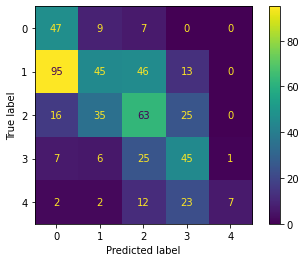

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_test =  np.argmax(predicition_test, axis= 1)
cm_test = confusion_matrix(df_test.label, class_prediction_test, labels=[0, 1, 2, 3, 4])
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels=[0, 1, 2, 3, 4])

disp_test.plot()

## DPhi에서 제공한 테스트 데이터 세트에 대한 예측 및 .csv파일 생성

In [53]:
test = pd.read_csv(compi_root_path + "Test.csv")

test_generator = valid_aug.flow_from_dataframe(
    dataframe= test,
    directory= compi_root_path + "test",
    x_col= "filename",
    y_col= None,
    batch_size= 1,
    seed= 42,
    shuffle= False,
    class_mode= None,
    target_size= (224,224)
)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1958 validated image filenames.


In [54]:
pred = xception_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
df_submit = pd.DataFrame({"label":np.argmax(pred, axis= 1)})
df_submit["label"].value_counts()

1958/1958 [==============================] - 14s 7ms/step


0    774
2    515
1    352
3    258
4     59
Name: label, dtype: int64

In [55]:
xception_model.save_weights("knee_xray_Xceptionnet_GPA.h5")
df_submit.to_csv("submission.csv",index=False)